**IMAGENET - ResNet50 - NESNE TANIMA** <br>
![alt text](https://raw.githubusercontent.com/deeplearningturkiye/pratik-derin-ogrenme-uygulamalari/944a247d404741ba37b9ef74de0716acff6fd4f9/images/dltr_logo.png)


**Gerekli paketler yükleniyor**

In [0]:
from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

**ImageNet veriseti ile eğitilmiş model ve ağırlıkları yükleniyor**

In [0]:
model = ResNet50(weights="imagenet")

102858752/102853048 [==============================] - 1s 0us/step


**Resmi girişe uygun formata getirmek için yeniden boyutlandırma fonksiyonu tanımlanıyor**

In [0]:
def prepare_image(image, target):
	# resize the input image and preprocess it
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# return the processed image
	return image

## **Sınıflandırma istediğiniz resmin web adresini aşağıdaki giirş alanına giriniz**

In [0]:
#@title Default title text
ImageURL = "https://i.cnnturk.com/ps/cnnturk/75/650x0/57ad7dd9a781b6264026292d.jpg" #@param {type:"string"}


**Girilen web adresinden resim indiriliyor**

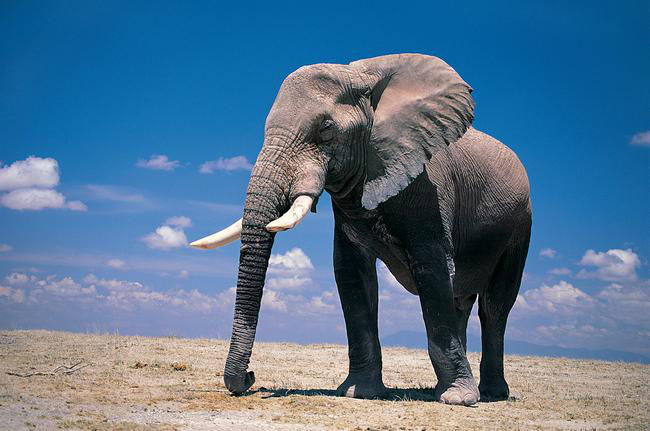

In [0]:
#ImageURL = "https://i.cnnturk.com/ps/cnnturk/75/650x0/57ad7dd9a781b6264026292d.jpg"
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

**Eğitilmiş model ile sınıflandırma yapılıyor.**

In [0]:
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224))

preds = model.predict(pre_image)

results = imagenet_utils.decode_predictions(preds)
data["predictions"] = []


for (imagenetID, label, prob) in results[0]:
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

{'success': True, 'predictions': [{'label': 'African_elephant', 'probability': 0.6730425357818604}, {'label': 'tusker', 'probability': 0.18517249822616577}, {'label': 'Indian_elephant', 'probability': 0.07864938676357269}, {'label': 'Arabian_camel', 'probability': 0.034435611218214035}, {'label': 'bison', 'probability': 0.003440132364630699}]}


In [0]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"]))


Sınıflandırma tahmini en yüksek olan 0.6730425357818604 oranıyla African_elephant'dır.
